##**COVID19 AND PNEUMONIA Classification using VGG-16 Model**
This tutorial includes the implementaion of the deep learning model, VGG-16 for multi-class classification on Chest X-ray (Covid-19 & Pneumonia) dataset. The following are the steps involved in this process.


1. Importing library
2. Data preparation
3. Visualization of Data
4. Create the model
5. Data Augmantaion
6. Training and Compailing the model
7. Evaluation of model










##Importing library pakeges

In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D

##**Data preparation**

> dataset : https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
IMAGE_SIZE = [224, 224]

data_path = "/content/gdrive/MyDrive/Data"
train_path = data_path +"/train"
test_path = data_path + "/test"
os.listdir(train_path)

['COVID19', 'PNEUMONIA', 'NORMAL']

##**Visualization of dataset**

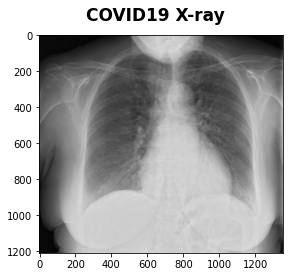

In [4]:
pneumonia_sample = imread(data_path + "/train/COVID19/COVID19(100).jpg")
plt.imshow(pneumonia_sample)
plt.suptitle("COVID19 X-ray", fontsize=17, weight="bold");

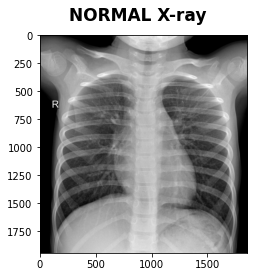

In [5]:
pneumonia_sample = imread(data_path + "/train/NORMAL/NORMAL(1002).jpg")
plt.imshow(pneumonia_sample)
plt.suptitle("NORMAL X-ray", fontsize=17, weight="bold");

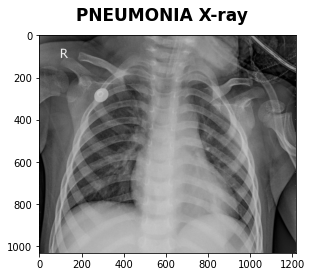

In [6]:
pneumonia_sample = imread(data_path + "/train/PNEUMONIA/PNEUMONIA(1005).jpg")
plt.imshow(pneumonia_sample)
plt.suptitle("PNEUMONIA X-ray", fontsize=17, weight="bold");

## **Create the Model**
The VGG16 architecture is a popular choice for image classification tasks due to its deep and complex structure. By using pre-trained weights from ImageNet, the model can quickly adapt to a new task with minimal training data. The final layer of the model is customized to output a probability distribution for the specific 3-class classification task. 

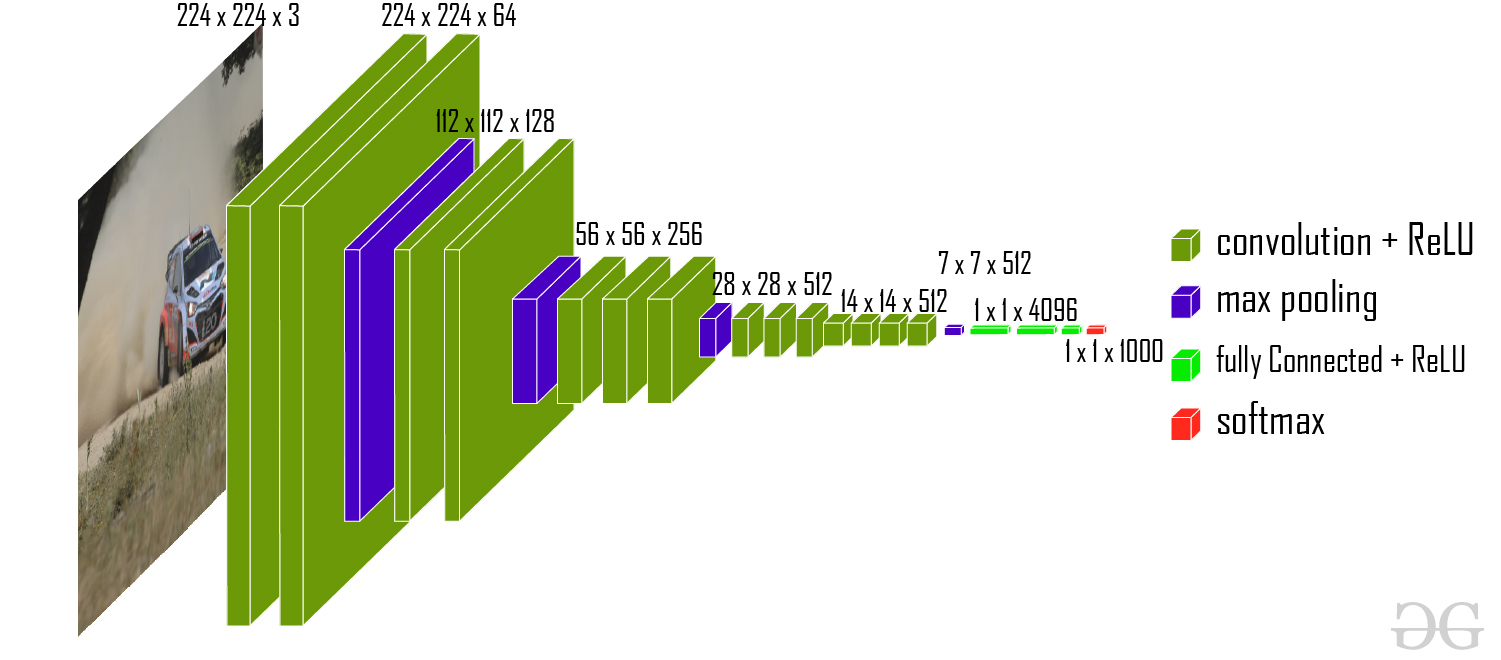

In [13]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [15]:
for layer in vgg.layers:
    layer.trainable = False

In [16]:
folders = data_path + "/train/*"
x = Flatten()(vgg.output)

In [17]:
prediction = Dense(3, activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

##**Data Augmantaion**
Data augmentation is a powerful technique for increasing the size of a training dataset and improving the generalization of a deep learning model. ImageDataGenerator is a built-in class in Keras that can be used to apply a range of image transformations in real-time during model training. This can help to prevent overfitting, improve model accuracy, and make the model more robust to variations in input data

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(data_path + "/train",
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory(data_path + "/test",
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


##**Training and compiling the model**
Compiling the model involves defining the loss function, optimizer, and evaluation metric, while training uses the fit_generator method to train the model on the augmented image data. During training, the model generates predictions on the training set and updates its weights to minimize the loss function, while monitoring the model's performance on the validation set. The trained model can be saved and used to generate predictions on new data.

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs=7,
                        steps_per_epoch=len(training_set)/2,
                        validation_steps=len(test_set)/2
                        )

<ipython-input-20-319e0142fbb4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set,


Epoch 1/7
257/257 [==============================] - 721s 3s/step - loss: 0.3238 - accuracy: 0.8869 - val_loss: 0.2438 - val_accuracy: 0.9108
Epoch 2/7
257/257 [==============================] - 404s 2s/step - loss: 0.2434 - accuracy: 0.9225 - val_loss: 0.2254 - val_accuracy: 0.9262
Epoch 3/7
257/257 [==============================] - 263s 1s/step - loss: 0.1835 - accuracy: 0.9363 - val_loss: 0.1329 - val_accuracy: 0.9631
Epoch 4/7
257/257 [==============================] - 191s 741ms/step - loss: 0.2129 - accuracy: 0.9359 - val_loss: 0.2854 - val_accuracy: 0.9277
Epoch 5/7
257/257 [==============================] - 164s 637ms/step - loss: 0.1881 - accuracy: 0.9378 - val_loss: 0.2697 - val_accuracy: 0.9277
Epoch 6/7
257/257 [==============================] - 136s 527ms/step - loss: 0.2485 - accuracy: 0.9275 - val_loss: 0.3841 - val_accuracy: 0.8954
Epoch 7/7
257/257 [==============================] - 124s 483ms/step - loss: 0.1926 - accuracy: 0.9442 - val_loss: 0.1692 - val_accuracy: 0

##**Evaluation of model**
Evaluating a deep learning model involves using evaluate() to generate predictions on test data and assessing its performance using metrics. Visual inspection and analysis tools can also be used.

In [21]:
# Evaluating the model
_, acc = model.evaluate(test_set, verbose = 1)
print('%.3f' % (acc * 100.0))

129/129 [==============================] - 38s 292ms/step - loss: 0.1439 - accuracy: 0.9573
95.730


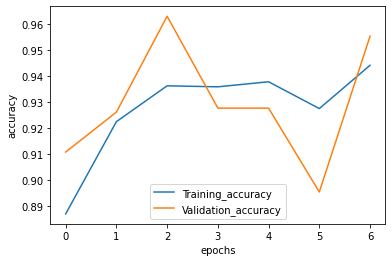

In [22]:
accs = r.history['accuracy']
val_accs = r.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()